In [1]:
## Bibliotecas para tratamento de dados, plotting e leitura de arquivos de dados
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob

## Geopandas: Utilizamos para conseguir ler arquivos do tipo Shape (.shp) 
import geopandas as gpd

## Pacotes PySAL
# libpysal: Biblioteca core do PySAL. Utilizamos o método de vizinhança Queen
from libpysal.weights.contiguity import Queen
# ESDA (Exploratory Spatial Data Analysis): utilizamos para o cálculo de correlação
from esda.moran import Moran_Local, Moran_BV, Moran_Local_BV
# SPlot: Utilizamos para fazer os plots espaciais
from splot.esda import moran_scatterplot, plot_local_autocorrelation, lisa_cluster, plot_moran_bv

In [12]:
MAPAS_PATH = "BR_Municipios_2020/"
DATA_PATH = "Histórico de Dados Meteorológicos - 2021/"

## Computamos as vizinhanças e pesos

Carregamos o shape file

<AxesSubplot:>

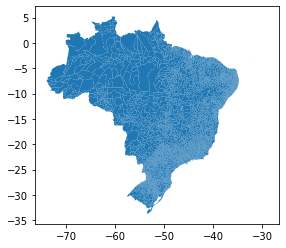

In [5]:
gdf = gpd.read_file(MAPAS_PATH + "BR_Municipios_2020.shp")
gdf.plot()

Aqui setamos o tipo de contiguidade que desejamos. Existem dois tipos predefinidos para definir vizinhança, que são o `Rook` e o `Queen`. A contiguidade `Rook` considera vizinhos aquelas regiões que têm bordas em comum. A contiguidade `Queen` é uma extensão da contiguidade `Rook` que considera também como vizinhas aquelas regiões cuja borda contém somente um ponto em comum. O nome vem das peças do jogo de xadres, e os métodos têm bastante diferença quando nossas regiões estão dispostas em _grid_ [[1]](#refs).

Aqui, vamos considerar o método `Queen` para calcular a matriz de contiguidade, mas o método `Rook` também poderia ser testado.

O resultado é uma matriz esparsa binária, indicando se uma região é vizinha de outra (1) ou não (0). Vamos também normalizar a matriz por linhas (`r`) usando a função `transform` [[2]](#refs).

In [10]:
weights = Queen.from_dataframe(gdf)
weights.transform = 'r'

C:\Users\marco\anaconda3\envs\spatial\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There are 2 islands with ids: 1525, 3499.
  warnings.warn(message)


('WARNING: ', 1525, ' is an island (no neighbors)')
('WARNING: ', 3499, ' is an island (no neighbors)')


Vemos quantos não zeros temos na matriz.

In [11]:
weights.pct_nonzero

0.10617278379624108

Vemos quantas regiões temos (`n`). Nossa matriz tem `n * n` valores.

In [13]:
weights.n

5570

Ou seja, temos 5570 municípios no Brasil.

## Preparamos nossos dados de pluviometria

<a id="refs"></a>
## Referências

[1] https://www.biomedware.com/files/documentation/clusterseer/Concepts/Polygon_contiguity.htm

[2] http://darribas.org/gds_scipy16/ipynb_md/03_spatial_weights.html